In [16]:
import pickle
import seaborn as sns
sns.set_style('white',rc={
    'xtick.bottom': True,
    'ytick.left': True,
})
configs = [(True, True), (False, True), (True, False), (False, False)]
data = []
for max_length, fill_0 in configs:
    data.append(pickle.load(
        open(f't5-large_obqa_fact_epoch_1_{max_length}_{fill_0}_loss.pkl', 'rb')))

In [3]:
import numpy as np
from pandas import DataFrame


def get_str(flex_max_length, fill_0):
    return f"{'Flexible' if flex_max_length else 'Fixed'}Max Length\n{'Filled' if fill_0 else 'Not filled'} with 0"


col_name = []
di = {'# Step': np.arange(len(data[0]))}
for idx, (Fixed, fill_0) in enumerate(configs):
    ss=get_str(Fixed, fill_0)
    if idx==1:
        ss=f'{ss} (MC-ED)'
    di[ss] = data[idx]

df = DataFrame(di).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']

In [4]:
accuracy = [[14, 24, 31, 31, 36, 37],
            [44, 55, 62, 60, 62, 66],
            [16, 27, 35, 38, 40, 37],
            [39, 49, 50, 51, 58, 63]]
steps = [150*(i+1) for i in range(len(accuracy[0]))]
di1 = {'# Step': steps}
for idx, (flex_max_length, fill_0) in enumerate(configs):
    di1[get_str(flex_max_length, fill_0)] = accuracy[idx]

df1 = DataFrame(di1).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Accuracy'})

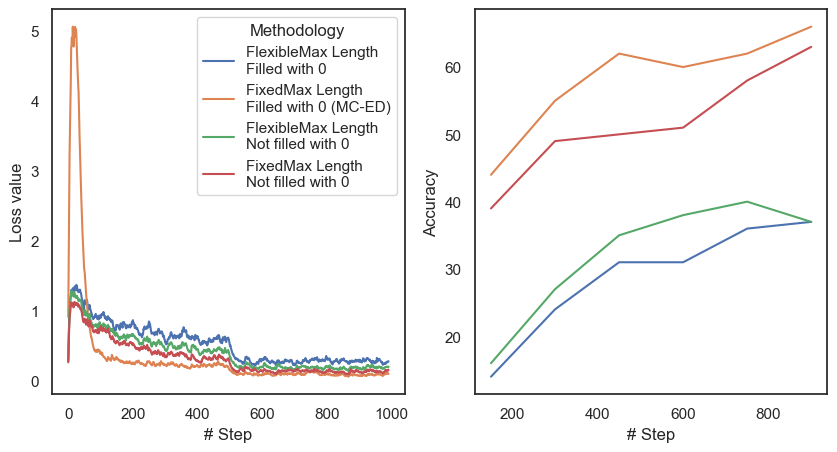

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(df, x='# Step', y='Loss value', hue='Methodology', ax=ax[0])
sns.move_legend(ax[0], "upper right")
sns.lineplot(df1, x='# Step', y='Accuracy', hue='Methodology', ax=ax[1])
ax[1].legend().remove()

### Different scheme with fixed max length and filled 0

In [6]:
acc1 = [[44, 55, 62, 60, 62, 66],
        [69,75,76.4, 75.5,76.4,77.8],
        [69,75,76.4,75.6,76.4,77.8],
        [40,56,62,61,62,63],
        [42, 56, 63, 63, 62, 65]]
data[1]
acc_df = {'# Step': steps}
scheme = ['Directed 6 ways', 'Undirected 6 ways',
          'Directed 1 way', 'Undirected 1 way']
prime = f'{get_str(flex_max_length=False, fill_0=True)} (MC-ED)'
acc_df[prime] = acc1[0]
acc_df[scheme[0]] = acc1[1]
acc_df[scheme[1]] = acc1[2]
acc_df[scheme[2]] = acc1[3]
acc_df[scheme[3]] = acc1[4]
acc_dfp = DataFrame(acc_df).melt(
    id_vars='# Step', var_name='Methodology').rename(columns={'value': 'Accuracy'})

loss_df = {'# Step': np.arange(len(data[1]))}
loss_df[prime] = data[1]
loss_df[scheme[0]] = pickle.load(
    open(f'6way_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[1]] = pickle.load(
    open(f'Scheme.UNDIRECTED_6W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[2]] = pickle.load(
    open(f'Scheme.DIRECTED_1W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[3]] = pickle.load(
    open(f'Scheme.UNDIRECTED_1W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_dfp = DataFrame(loss_df).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(loss_dfp[loss_dfp['# Step'] > 100], x='# Step',
             y='Loss value', hue='Methodology', ax=ax[0])
sns.lineplot(acc_dfp, x='# Step', y='Accuracy', hue='Methodology', ax=ax[1])
ax[0].legend().remove()

FileNotFoundError: [Errno 2] No such file or directory: '6way_new_t5-large_obqa_fact_epoch_1_loss.pkl'

In [7]:
l1_after, l2_after = pickle.load(
    open('Scheme.UNDIRECTED_6W_hyper_weight_values.pkl', 'rb'))
l2_before, l1_before  = pickle.load(
    open('Scheme.Undirected_6w_weight_before.pkl', 'rb'))


[Text(0.5, 0, 'Hyper Dimensional Position and Bucketized Positional Embedding')]

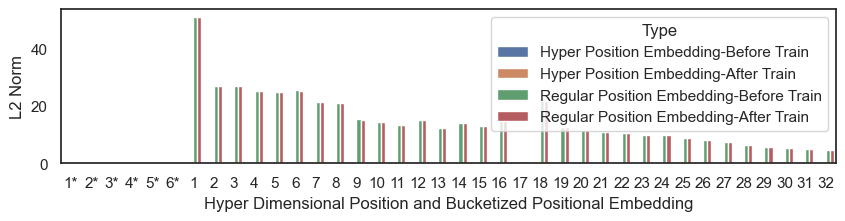

In [22]:
from numpy import linalg
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
x_label='Bucketized Positional Embedding'
kk = {'Type': ['Hyper Position Embedding-Before Train']*6, x_label: [
    f'{x}*' for x in range(1, 7)], 'L2 Norm': [linalg.norm(x) for x in l1_before]}
for index, m in enumerate(l1_after):
    kk['Type'].append('Hyper Position Embedding-After Train')
    kk[x_label].append(f'{index+1}*')
    kk['L2 Norm'].append(linalg.norm(m))
for index, m in enumerate(l2_before):
    kk['Type'].append('Regular Position Embedding-Before Train')
    kk[x_label].append(index+1)
    kk['L2 Norm'].append(linalg.norm(m))

for index, m in enumerate(l2_after):
    kk['Type'].append('Regular Position Embedding-After Train')
    kk[x_label].append(index+1)
    kk['L2 Norm'].append(linalg.norm(m))

df_norm = DataFrame(kk)
ax=sns.barplot(df_norm, x=x_label, y='L2 Norm', hue='Type',ax=ax,palette=["C0", "C1", "C2","C3"])
ax.set(xlabel='Hyper Dimensional Position and Bucketized Positional Embedding')
# ax[0].set(xlabel=None)

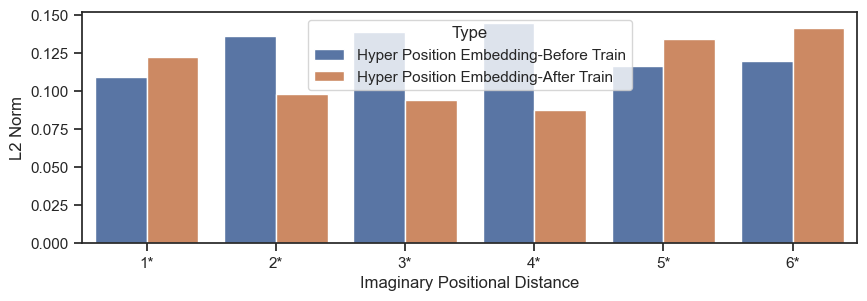

In [18]:
ax=sns.barplot(df_norm[df_norm['Type'].apply(lambda x:'Hyper' in x)], x='Imaginary Positional Distance', y='L2 Norm', hue='Type',palette=['C0','C1'])
# ax.legend().remove()

<Axes: xlabel='Bucketized Positional Embedding', ylabel='L2 Norm'>

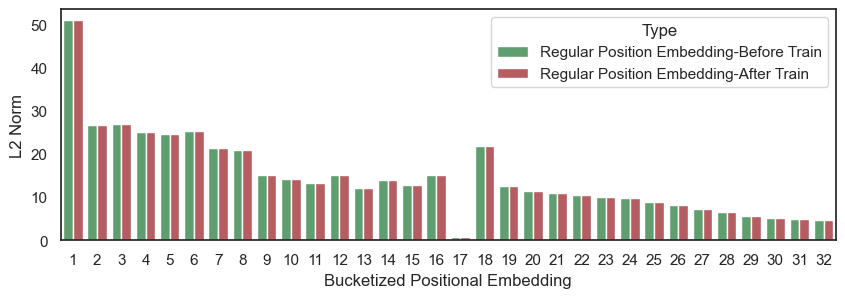

In [20]:
from numpy import linalg
l2_before,_   = pickle.load(
    open('Scheme.Undirected_6w_weight_before.pkl', 'rb'))
l2_after   = pickle.load(
    open('Scheme.MC-ED_positional_emb.pkl', 'rb'))
kk={'Type':[],x_label:[],'L2 Norm':[]}
for index, m in enumerate(l2_before):
    kk['Type'].append('Regular Position Embedding-Before Train')
    kk[x_label].append(index+1)
    kk['L2 Norm'].append(linalg.norm(m))

for index, m in enumerate(l2_after):
    kk['Type'].append('Regular Position Embedding-After Train')
    kk[x_label].append(index+1)
    kk['L2 Norm'].append(linalg.norm(m))

df_norm = DataFrame(kk)
sns.set_theme(style='white', rc={'figure.figsize':(10,3)})
sns.barplot(df_norm, x=x_label, y='L2 Norm', hue='Type',palette=["C2","C3"])

In [10]:
np.array([abs(linalg.norm(l2_before[i])-linalg.norm(l2_after[i])) for i in range(32)]).mean()

0.0106431395